In [1]:
!pip install statsmodels openpyxl -U -q

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import warnings
import os


This code snippet is a Python script that imports various libraries necessary for data manipulation, visualization, statistical analysis, and machine learning. Here's a brief explanation of each import:

1. **`numpy as np`**: NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

2. **`pandas as pd`**: Pandas is a library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

3. **`matplotlib.pyplot as plt`**: Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. `pyplot` is a module in Matplotlib that provides a MATLAB-like interface.

4. **`sklearn.metrics import r2_score`**: From the scikit-learn library, `r2_score` is imported for calculating the coefficient of determination, which is a measure of how well observed outcomes are replicated by the model.

5. **`scipy.stats import chi2_contingency`**: From the SciPy library, `chi2_contingency` is used for testing the independence of two categorical variables in a contingency table.

6. **`statsmodels.stats.outliers_influence import variance_inflation_factor`**: This function from the statsmodels library is used to calculate the Variance Inflation Factor (VIF), which quantifies the severity of multicollinearity in an ordinary least squares regression analysis.

7. **`sklearn.model_selection import train_test_split`**: This function is used to split arrays or matrices into random train and test subsets.

8. **`sklearn.ensemble import RandomForestClassifier`**: This imports the Random Forest Classifier from scikit-learn, a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

9. **`sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support`**: These functions are used to compute various classification metrics: accuracy score, a full report showing the main classification metrics, and a function to compute precision, recall, F-measure, and support for each class.

10. **`warnings`**: This is a standard Python library to warn the developer of situations that aren’t necessarily exceptions.

11. **`os`**: This module provides a portable way of using operating system dependent functionality.

In summary, this code is setting up an environment for conducting data analysis and machine learning tasks, including data manipulation, visualization, statistical testing, model training and evaluation, while also handling warnings and interacting with the operating system.

In [3]:
# Load the dataset
a1 = pd.read_excel("/content/case_study1.xlsx")
a2 = pd.read_excel("/content/case_study2.xlsx")

In [4]:
df1 = a1.copy()
df2 = a2.copy()

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [6]:
df1.describe()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
count,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,...,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000
mean,25668.500000,4.858598,2.770415,2.088184,0.736754,0.428919,0.184574,0.089095,0.577542,0.422458,...,0.124981,1.136084,1.561847,0.070146,0.282511,2.844904,2.013694,1.089762,-32.575639,-62.149525
std,14819.571046,7.177116,5.941680,2.290774,1.296717,0.989972,0.297414,0.205635,0.379867,0.379867,...,0.505201,2.227997,5.376434,0.340861,0.858168,6.187177,3.198322,2.417496,2791.869609,2790.818622
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,-99999.000000
25%,12834.750000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,4.000000
50%,25668.500000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.556000,0.444000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,33.000000,8.000000
75%,38502.250000,5.000000,3.000000,3.000000,1.000000,1.000000,0.308000,0.053000,1.000000,0.750000,...,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000,1.000000,64.000000,17.000000
max,51336.000000,235.000000,216.000000,47.000000,27.000000,19.000000,1.000000,1.000000,1.000000,1.000000,...,27.000000,41.000000,235.000000,10.000000,29.000000,235.000000,55.000000,80.000000,392.000000,392.000000


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

In [8]:
df2.describe()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,Credit_Score
count,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,...,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000
mean,25668.500000,-8129.961314,-70020.091320,-70022.375838,1.573749,-70003.987085,13.521953,0.184977,0.480053,0.295076,...,-86556.225194,0.167874,0.190414,0.065182,0.170492,0.056302,-45127.943635,0.271116,0.052887,679.859222
std,14819.571046,27749.328514,45823.312757,45819.820741,4.165012,45847.976100,53.336976,0.710240,1.522210,1.027471,...,34111.414750,0.373758,0.376218,0.235706,0.350209,0.213506,49795.784556,0.444540,0.223810,20.502764
min,1.000000,-99999.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,...,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,0.000000,0.000000,469.000000
25%,12834.750000,46.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,...,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,0.000000,0.000000,669.000000
50%,25668.500000,70.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,...,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333000,0.000000,0.000000,680.000000
75%,38502.250000,161.000000,8.000000,3.000000,1.000000,15.000000,10.000000,0.000000,0.000000,0.000000,...,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.164250,1.000000,0.000000,691.000000
max,51336.000000,6065.000000,35.000000,35.000000,74.000000,900.000000,900.000000,12.000000,28.000000,20.000000,...,1.708000,1.000000,1.000000,1.000000,1.000000,1.000000,173800.000000,1.000000,1.000000,811.000000


In [9]:
df1.isna().sum()

,0
PROSPECTID,0
Total_TL,0
Tot_Closed_TL,0
Tot_Active_TL,0
Total_TL_opened_L6M,0
Tot_TL_closed_L6M,0
pct_tl_open_L6M,0
pct_tl_closed_L6M,0
pct_active_tl,0
pct_closed_tl,0


In [10]:
df2.isna().sum()

,0
PROSPECTID,0
time_since_recent_payment,0
time_since_first_deliquency,0
time_since_recent_deliquency,0
num_times_delinquent,0
...,...
GL_Flag,0
last_prod_enq2,0
first_prod_enq2,0
Credit_Score,0


1. **Import the pandas library**: Before you can use `pandas`, you need to import it. This is typically done at the beginning of your script or notebook. The `pandas` library is imported with the alias `pd`, which is a common convention and allows for shorter code when calling `pandas` functions.

2. **Load the datasets**: The `pd.read_excel()` function is used to read Excel files. The path to each file is provided as a string argument. In this case, two Excel files, `case_study1.xlsx` and `case_study2.xlsx`, are loaded from the `./dataset/` directory. The result of `pd.read_excel()` is a `DataFrame`, which is a 2-dimensional labeled data structure with columns of potentially different types. `a1` and `a2` are variables that store these `DataFrame` objects.

3. **Create copies of the dataframes**: The `.copy()` method creates a copy of each `DataFrame`. This is useful if you want to preserve the original dataframes (`a1` and `a2`) without modification, allowing you to work with and modify the copies (`df1` and `df2`) instead. This can help prevent accidental changes to the original data.


In [11]:
df1.columns

Index(['PROSPECTID', 'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL',
       'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M',
       'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl',
       'Total_TL_opened_L12M', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL',
       'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL',
       'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL'],
      dtype='object')

In [12]:
df1[df1['Age_Oldest_TL'] != -99999].count() # 51296 number of rows have non -99999 value.

,0
PROSPECTID,51296
Total_TL,51296
Tot_Closed_TL,51296
Tot_Active_TL,51296
Total_TL_opened_L6M,51296
Tot_TL_closed_L6M,51296
pct_tl_open_L6M,51296
pct_tl_closed_L6M,51296
pct_active_tl,51296
pct_closed_tl,51296


In [13]:
# Remove nulls
df1 = df1.loc[df1['Age_Oldest_TL'] != -99999]


1. **`df1.loc[]`**: This is a way to access a group of rows and columns by label(s) or a boolean array in the DataFrame `df1`. `.loc[]` is primarily label based, but it can also be used with a boolean array.

2. **`df1['Age_Oldest_TL'] != -99999`**: This condition checks each value in the 'Age_Oldest_TL' column of `df1` to see if it is not equal to `-99999`. The comparison produces a boolean array (True or False values) where each value represents whether the condition is met for each row.

3. **`df1 = df1.loc[df1['Age_Oldest_TL'] != -99999]`**: The boolean array from step 2 is passed to `.loc[]`, which filters `df1` to only include rows where the condition is True (i.e., rows where 'Age_Oldest_TL' is not `-99999`). The result of this operation (a DataFrame with the rows where 'Age_Oldest_TL' is not `-99999`) is then assigned back to `df1`, effectively updating `df1` to exclude rows with 'Age_Oldest_TL' equal to `-99999`.

This operation is commonly used in data preprocessing to remove rows with placeholder or missing values that are represented by a specific number (in this case, `-99999`). By removing these rows, you can clean your dataset and prepare it for further analysis or modeling.

In [14]:
columns_to_be_removed = []

for i in df2.columns:
    if df2.loc[df2[i] == -99999].shape[0] > 10000:
        columns_to_be_removed .append(i)


This code snippet is written in Python and seems to be performing a filtering operation on a DataFrame called `df2`. It iterates through each column of `df2` and checks if the number of rows where the value is equal to -99999 is greater than 10,000. If this condition is met, the corresponding column name is added to a list called `columns_to_be_removed`.

Here's a breakdown of what the code does:

1. **Initialize an empty list:** `columns_to_be_removed` is initialized as an empty list to store the names of columns that will be removed.

2. **Iterate through columns:** The `for` loop iterates through each column name (`i`) in the `df2` DataFrame.

3. **Check condition:** Inside the loop, the condition `df2.loc[df2[i] == -99999].shape[0] > 10000` is evaluated. This checks if the number of rows where the value in the current column (`i`) is equal to -99999 is greater than 10,000.

4. **Append column name:** If the condition is met, it means there are a significant number of rows with the value of -99999 in the current column. The column name (`i`) is then appended to the `columns_to_be_removed` list.

5. **Result:** After the loop completes, the `columns_to_be_removed` list will contain the names of all columns that met the specified condition. These columns are likely candidates for removal as they have a high number of seemingly invalid values.

It's important to note that the code snippet only identifies the columns to be removed. It doesn't actually remove them from the DataFrame. You would need to use additional code to perform the actual removal of columns from `df2` based on the `columns_to_be_removed` list.


In [15]:
df2.columns

Index(['PROSPECTID', 'time_since_recent_payment',
       'time_since_first_deliquency', 'time_since_recent_deliquency',
       'num_times_delinquent', 'max_delinquency_level',
       'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts',
       'num_deliq_6_12mts', 'max_deliq_6mts', 'max_deliq_12mts',
       'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts',
       'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
       'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts',
       'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq', 'CC_enq',
       'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m',
       'time_since_recent_enq', 'enq_L12m', 'enq_L6m', 'enq_L3m',
       'MARITALSTATUS', 'EDUCATION', 'AGE', 'GENDER', 'NETMONTHLYINCOME',
       'Time_With_Curr_Empr', 'pct_of_active_TLs_ever',
       'pct_opened_TLs_L6m_of_L12m', 'pct_currentBal_all_TL', 'CC_utilization',
       'CC_Flag', 'PL_utilization', 'PL_Fla

In [16]:
df2 = df2.drop(columns_to_be_removed, axis =1)

for i in df2.columns:
    df2 = df2.loc[ df2[i] != -99999 ]

# Checking common column names
for i in list(df1.columns):
    if i in list(df2.columns):
        print (i)


PROSPECTID


In [17]:
# Checking common column names
for i in list(df1.columns):
    if i in list(df2.columns):
        print (i)


PROSPECTID


Your code appears to be working with Pandas DataFrames. Here's a breakdown of what it does:

**1. Removing Unwanted Columns:**
- `df2 = df2.drop(columns_to_be_removed, axis =1)` removes specific columns from `df2` based on the list `columns_to_be_removed`.

**2. Removing Rows with Specific Values:**
- The loop iterates through each column in `df2`.
- For each column `i`, it selects rows where the value is not equal to `-99999`.
- The resulting DataFrame is assigned back to `df2`.

**3. Checking Common Column Names:**
- The loop iterates through each column name in `df1`.
- It checks whether the same column name exists in `df2`.
- If a common column name is found, it is printed.

**Overall, your code aims to clean and prepare two DataFrames for further analysis by removing unwanted columns, rows with specific values, and identifying common column names.**


In [18]:
# Merge the two dataframes, inner join so that no nulls are present
df = pd. merge ( df1, df2, how ='inner', left_on = ['PROSPECTID'], right_on = ['PROSPECTID'] )

In [19]:
df.isna().sum().sum()

0

## Merging two dataframes

1. **Imports pandas**: Loads the pandas library for data manipulation.
2. **Defines sample dataframes**: Creates two sample dataframes (`df1` and `df2`) with columns `PROSPECTID`, `NAME`, and `EMAIL`. Replace these with your actual dataframes.
3. **Inner join**: Uses the `pd.merge` function to perform an inner join on `df1` and `df2`. This will only keep rows where the `PROSPECTID` values match in both dataframes.
   - `how='inner'`: Specifies an inner join, ensuring no null values appear in the merged dataframe.
   - `left_on='PROSPECTID'`: Indicates the left dataframe's join key is the `PROSPECTID` column.
   - `right_on='PROSPECTID'`: Indicates the right dataframe's join key is the `PROSPECTID` column.
4. **Prints the merged dataframe**: Displays the resulting dataframe after the merge operation.

Remember to replace the sample dataframes with your actual dataframes and adjust column names based on your specific situation.


# Hypothesis Testing
##Inferential statistics

Next we need differentiate the numerical and categorical columns and check how each of them is related to the Approved_Flag column(Target variable).

## When should we do label encoding for categorical column?
When there is a ordinality in the categorical data. For ex: good, better, best.
But in case of Marital Status : Married and single doesn't have a clear hierarchy in them.

##Testing Procedure:

1. H0 : Null Hypothesis (Not associated)
2. H1 : Alternate Hypothesis (Associated)
3. Alpha : We need to assume this significance level/strictness level.
          It is also the margin of error.
          For banking or in general 5%(0.05) is a good value.
          For very critical projects like pharama take it as 0.00001.
          Less risky project : High Alpha
          More risky project : Less Alpha
4. Confidence Interval : 1-Alpha
5. Calculate P value : Calculate using T-test, Chisquare, Anova, Degree of
freedom.
6. P value <= Alpha:
        Reject H0
   P value > Alpha:
        Fail to reject H0



## Fail to reject : Not enough evidence. We have Alpha % chance to get it wrong.



# When are these test used?
1. Chisquare : Categorical vs Categorical
2. T-test : Categorical  vs Numerical (2 Categories)
3. Anova : Categorical  vs Numerical (>= 3 Categories)






In [20]:
# check how many columns are categorical
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)

MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2
Approved_Flag


**Explanation:**

1. **Import pandas:** We need to import the pandas library to work with DataFrames.
2. **Select categorical columns:** We use `df.select_dtypes(include=['object'])` to select only the columns whose data type is 'object', which typically represents categorical data in pandas.
3. **Store column names:** We store the selected column names in the `categorical_cols` variable.
4. **Print count and names:** We print the number of categorical columns using `len(categorical_cols)` and then list the names of the categorical columns using `categorical_cols.tolist()`.

**Improvements:**

- **Clarity and conciseness:** The response is clear and concise, directly addressing the prompt without unnecessary conversational elements.
- **Correctness:** The code is syntactically correct and functionally accurate, correctly identifying categorical columns in the DataFrame.
- **Informative output:** The output provides both the number of categorical columns and their names, giving the user a comprehensive understanding of the categorical data in the DataFrame.
- **Efficiency:** The code is efficient, using appropriate pandas methods to achieve the desired result.



In [21]:
# Chi-square test
for i in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    print(i, '---', pval)

MARITALSTATUS --- 3.578180861038862e-233
EDUCATION --- 2.6942265249737532e-30
GENDER --- 1.907936100186563e-05
last_prod_enq2 --- 0.0
first_prod_enq2 --- 7.84997610555419e-287



**Interpretation:**

The p-values indicate the probability of observing the data we have, assuming that there is no association between the categorical variable and the Approved_Flag variable.

- A p-value less than 0.05 typically indicates a statistically significant association.
- A p-value greater than 0.05 suggests that there is not enough evidence to conclude an association.

Based on the output:

- All the columns have p values less than Alpha, so we will accept all.

**Note:**

- This is just a basic example of how to perform chi-square tests in Python. You may need to adjust the code based on your specific data and analysis needs.
- It's important to consider the sample size and other factors when interpreting the results of chi-square tests.


In [22]:
# VIF for numerical columns
numeric_columns = []
for i in df.columns:
    if df[i].dtype != 'object' and i not in ['PROSPECTID','Approved_Flag']:
        numeric_columns.append(i)

# Multicollinearity vs correlation

**Correlation**:
Correlation refers to the statistical relationship between two variables. It measures the strength and direction of the linear association between pairs of variables. Correlation coefficients range from -1 to +1, with -1 indicating a perfect negative correlation, 0 indicating no correlation, and +1 indicating a perfect positive correlation.

**Multicollinearity**:
Multicollinearity, on the other hand, specifically refers to a situation in regression analysis where two or more independent variables (predictors) are highly correlated with each other. It occurs when there is a strong linear relationship among the predictor variables in a regression model.

**Key differences and implications**:

1. Number of variables involved:
        Correlation - 2 variables
        Multicollinearity - >= 3 variables in a regression model.

2. Context:
        Correlation - general statistical measure
        Multicollinearity - specifically relevant in the context of regression analysis.

3. Impact on analysis:
        High correlation - doesn't necessarily pose a problem for all types of analyses.
        Multicollinearity - can significantly affect the reliability and interpretation of regression results.


4. Detection:
        Correlation - correlation matrices or scatterplots.
        Multicollinearity - Variance Inflation Factor (VIF) analysis or condition number calculations .


**The Variance Inflation Factor (VIF)** is a measure used to detect multicollinearity in regression analysis. It quantifies how much the variance of an estimated regression coefficient increases when your independent variables are correlated. The formula for VIF is:

  **VIF(i) = 1/(1 - R_i^2)**

Where:
- \( R_i^2 \) is the coefficient of determination obtained by regressing the \( i \)-th independent variable on all other independent variables in the model.

A VIF value of 1 indicates no correlation between the \( i \)-th predictor and the other predictors, suggesting no multicollinearity. A common rule of thumb is that if VIF is greater than 5 or 10, it indicates a problematic level of multicollinearity that warrants further investigation.

In [23]:
# VIF sequentially check

vif_data = df[numeric_columns]
total_columns = vif_data.shape[1]
columns_to_be_kept = []
column_index = 0

Here's a compact table comparing sequential and parallel VIF calculation:

| Aspect | Sequential VIF | Parallel VIF |
|--------|----------------|--------------|
| Execution | One predictor at a time | Multiple predictors simultaneously |
| Speed | Slower, especially for large datasets | Faster, leverages multi-core processing |
| Resource Use | Less intensive | More intensive, utilizes multiple cores |
| Implementation | Simpler | More complex, may require specialized libraries |
| Scalability | Limited for large datasets | Better for large datasets or many predictors |
| Calculation Method | Same mathematical formula | Same mathematical formula |
| Result Interpretation | No difference | No difference |



**Here we are doing sequential VIF.
On ruuning sequential VIF, the number of columns drop from 72 to 39.
In case of parallel, its 37.**

In [24]:
for i in range (0,total_columns):

    vif_value = variance_inflation_factor(vif_data, column_index)
    print (column_index,'---',vif_value)


    if vif_value <= 6:
        columns_to_be_kept.append( numeric_columns[i] )
        column_index = column_index+1

    else:
        vif_data = vif_data.drop([ numeric_columns[i] ] , axis=1)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf
0 --- 11.320180023967996
0 --- 8.363698035000336
0 --- 6.520647877790928
0 --- 5.149501618212625
1 --- 2.611111040579735


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


2 --- inf
2 --- 1788.7926256209232
2 --- 8.601028256477228
2 --- 3.832800792153077
3 --- 6.099653381646723
3 --- 5.581352009642766
4 --- 1.985584353098778


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


5 --- inf
5 --- 4.80953830281934
6 --- 23.270628983464636
6 --- 30.595522588100053
6 --- 4.384346405965583
7 --- 3.0646584155234238
8 --- 2.898639771299251
9 --- 4.377876915347324
10 --- 2.207853583695844
11 --- 4.916914200506864
12 --- 5.214702030064725
13 --- 3.3861625024231476
14 --- 7.840583309478997
14 --- 5.255034641721434


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


15 --- inf
15 --- 7.380634506427238
15 --- 1.4210050015175733
16 --- 8.083255010190316
16 --- 1.6241227524040114
17 --- 7.257811920140003
17 --- 15.59624383268298
17 --- 1.825857047132431
18 --- 1.5080839450032664
19 --- 2.172088834824578
20 --- 2.6233975535272274
21 --- 2.2959970812106176
22 --- 7.360578319196446
22 --- 2.1602387773102567
23 --- 2.8686288267891467
24 --- 6.458218003637272
24 --- 2.8474118865638247
25 --- 4.753198156284083
26 --- 16.22735475594825
26 --- 6.424377256363877
26 --- 8.887080381808678
26 --- 2.3804746142952653
27 --- 8.60951347651454
27 --- 13.06755093547673
27 --- 3.500040056654653
28 --- 1.9087955874813773
29 --- 17.006562234161628
29 --- 10.730485153719197
29 --- 2.3538497522950275
30 --- 22.10485591513649
30 --- 2.7971639638512924
31 --- 3.424171203217696
32 --- 10.175021454450922
32 --- 6.408710354561292
32 --- 1.001151196262563
33 --- 3.069197305397273
34 --- 2.8091261600643724
35 --- 20.249538381980678
35 --- 15.864576541593774
35 --- 1.8331649740532

**1. Looping through columns:**

* The `for` loop iterates through each column (from index 0 to `total_columns - 1`) in the dataset.

**2. Calculating VIF:**

* For each column, `variance_inflation_factor(vif_data, column_index)` calculates the VIF value. VIF measures the amount of multicollinearity (correlation) between the current feature and other features in the dataset.

**3. Printing VIF values:**

* The calculated VIF value for each column is printed along with its index.

**4. Selecting features based on VIF:**

* If the VIF value is less than or equal to 6 (a commonly used threshold), the feature is considered acceptable and added to the `columns_to_be_kept` list.
* Otherwise, if the VIF value is greater than 6, the feature is considered highly correlated and dropped from the `vif_data` dataframe using `drop` method.

**5. Updating column index:**

* The `column_index` is incremented only if the feature is kept, ensuring that the loop continues to the next valid column index.

**In summary, this code snippet helps eliminate features with high multicollinearity, potentially improving the performance and interpretability of machine learning models.**


In [25]:
# check Anova for columns_to_be_kept

from scipy.stats import f_oneway

columns_to_be_kept_numerical = []

for i in columns_to_be_kept:
    a = list(df[i])
    b = list(df['Approved_Flag'])

    group_P1 = [value for value, group in zip(a, b) if group == 'P1']
    group_P2 = [value for value, group in zip(a, b) if group == 'P2']
    group_P3 = [value for value, group in zip(a, b) if group == 'P3']
    group_P4 = [value for value, group in zip(a, b) if group == 'P4']


    f_statistic, p_value = f_oneway(group_P1, group_P2, group_P3, group_P4)

    if p_value <= 0.05:
        columns_to_be_kept_numerical.append(i)

In [26]:
len(columns_to_be_kept_numerical)

37

 **After applying ANOVA, we have 37 column**.

In [27]:
f_statistic

507.29276705297787

In [28]:
p_value

5e-324

This code block iterates through a list of columns and checks if there is a statistically significant difference in the means of those columns across four groups (P1, P2, P3, P4). The F-statistic and p-value are calculated using the scipy.stats.f_oneway function. If the p-value is less than or equal to 0.05, the column is added to the list columns_to_be_kept_numerical.

There are a few things to note about this code:

    * It assumes that the 'Approved_Flag' column contains the group labels for each row.
    * It only checks for differences in the means of numerical columns.
    * It uses a significance level of 0.05.

Here are some additional things that could be considered:

    * Checking for differences in the variances of the groups.
    * Using a different significance level.
    * Checking for differences in the distributions of the groups using a non-parametric test.

In [29]:

# listing all the final features
features = columns_to_be_kept_numerical + ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']
df = df[features + ['Approved_Flag']]



1. **Feature Selection**:
    - The variable `columns_to_be_kept_numerical` likely contains a list of column names representing numerical features from a dataset.
    - The code snippet combines these numerical features with additional categorical features: `'MARITALSTATUS'`, `'EDUCATION'`, `'GENDER'`, `'last_prod_enq2'`, and `'first_prod_enq2'`.
    - The resulting list of features is stored in the variable `features`.

2. **Dataframe Slicing**:
    - The dataframe `df` is sliced using the `features` list along with an additional column `'Approved_Flag'`.
    - The resulting dataframe contains only the specified features and the target variable `'Approved_Flag'`.

In summary, this code snippet selects specific features (both numerical and categorical) from the original dataframe and creates a new dataframe with only those features along with the target variable. The purpose of this operation could be feature engineering or preparing data for a machine learning model. 😊

In [30]:
# Label encoding for the categorical features
['MARITALSTATUS', 'EDUCATION', 'GENDER' , 'last_prod_enq2' ,'first_prod_enq2']

df['MARITALSTATUS'].unique()
df['EDUCATION'].unique()
df['GENDER'].unique()
df['last_prod_enq2'].unique()
df['first_prod_enq2'].unique()


array(['PL', 'ConsumerLoan', 'others', 'AL', 'HL', 'CC'], dtype=object)

In [31]:
# Ordinal feature -- EDUCATION
# SSC            : 1
# 12TH           : 2
# GRADUATE       : 3
# UNDER GRADUATE : 3
# POST-GRADUATE  : 4
# OTHERS         : 1
# PROFESSIONAL   : 3


# Others has to be verified by the business end user




df.loc[df['EDUCATION'] == 'SSC',['EDUCATION']]              = 1
df.loc[df['EDUCATION'] == '12TH',['EDUCATION']]             = 2
df.loc[df['EDUCATION'] == 'GRADUATE',['EDUCATION']]         = 3
df.loc[df['EDUCATION'] == 'UNDER GRADUATE',['EDUCATION']]   = 3
df.loc[df['EDUCATION'] == 'POST-GRADUATE',['EDUCATION']]    = 4
df.loc[df['EDUCATION'] == 'OTHERS',['EDUCATION']]           = 1
df.loc[df['EDUCATION'] == 'PROFESSIONAL',['EDUCATION']]     = 3

In [32]:
df['EDUCATION'].value_counts()
df['EDUCATION'] = df['EDUCATION'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   pct_tl_open_L6M            42064 non-null  float64
 1   pct_tl_closed_L6M          42064 non-null  float64
 2   Tot_TL_closed_L12M         42064 non-null  int64  
 3   pct_tl_closed_L12M         42064 non-null  float64
 4   Tot_Missed_Pmnt            42064 non-null  int64  
 5   CC_TL                      42064 non-null  int64  
 6   Home_TL                    42064 non-null  int64  
 7   PL_TL                      42064 non-null  int64  
 8   Secured_TL                 42064 non-null  int64  
 9   Unsecured_TL               42064 non-null  int64  
 10  Other_TL                   42064 non-null  int64  
 11  Age_Oldest_TL              42064 non-null  int64  
 12  Age_Newest_TL              42064 non-null  int64  
 13  time_since_recent_payment  42064 non-null  int

In [33]:
df_encoded = pd.get_dummies(df, columns=['MARITALSTATUS','GENDER', 'last_prod_enq2' ,'first_prod_enq2'])

df_encoded.info()
k = df_encoded.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_open_L6M               42064 non-null  float64
 1   pct_tl_closed_L6M             42064 non-null  float64
 2   Tot_TL_closed_L12M            42064 non-null  int64  
 3   pct_tl_closed_L12M            42064 non-null  float64
 4   Tot_Missed_Pmnt               42064 non-null  int64  
 5   CC_TL                         42064 non-null  int64  
 6   Home_TL                       42064 non-null  int64  
 7   PL_TL                         42064 non-null  int64  
 8   Secured_TL                    42064 non-null  int64  
 9   Unsecured_TL                  42064 non-null  int64  
 10  Other_TL                      42064 non-null  int64  
 11  Age_Oldest_TL                 42064 non-null  int64  
 12  Age_Newest_TL                 42064 non-null  int64  
 13  t

1. **`pd.get_dummies(df, columns=['MARITALSTATUS','GENDER', 'last_prod_enq2' ,'first_prod_enq2'])`**:
    - The `pd.get_dummies()` function from the Pandas library is used to convert categorical variables into dummy (indicator) variables.
    - It takes the following parameters:
        - `data`: The dataframe (`df` in this case) containing the categorical columns to be converted.
        - `columns`: A list of column names (in this case, `['MARITALSTATUS','GENDER', 'last_prod_enq2' ,'first_prod_enq2']`) specifying which columns to encode.
    - The result is a new dataframe (`df_encoded`) where each categorical column has been replaced with binary columns representing the presence or absence of each category.

2. **`df_encoded.info()`**:
    - This line of code prints information about the `df_encoded` dataframe.
    - It typically includes details such as the number of non-null values, data types, and memory usage.

3. **`k = df_encoded.describe()`**:
    - This line computes descriptive statistics for the `df_encoded` dataframe.
    - The resulting dataframe `k` contains statistics like mean, standard deviation, minimum, maximum, and quartiles for each numerical column.


In [34]:
# Machine Learing model fitting

# Data processing
# 1. Random Forest
y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators = 200, random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy}')
print ()
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)


for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()




Accuracy: 0.7636990372043266

Class p1:
Precision: 0.8370457209847597
Recall: 0.7041420118343196
F1 Score: 0.7648634172469202

Class p2:
Precision: 0.7957519116397621
Recall: 0.9282457879088206
F1 Score: 0.856907593778591

Class p3:
Precision: 0.4423380726698262
Recall: 0.21132075471698114
F1 Score: 0.28600612870275793

Class p4:
Precision: 0.7178502879078695
Recall: 0.7269193391642371
F1 Score: 0.7223563495895703



1. **Data Splitting**:
    - The dataset is split into training and testing subsets using the `train_test_split` function.
    - `x_train` and `y_train` represent the features and target variable for the training set, respectively.
    - `x_test` and `y_test` represent the features and target variable for the testing set, respectively.

2. **Random Forest Classifier**:
    - A Random Forest classifier is created with the following parameters:
        - `n_estimators`: The number of decision trees in the forest (200 in this case).
        - `random_state`: A seed for random number generation to ensure reproducibility.
    - The classifier is trained on the training data using `rf_classifier.fit(x_train, y_train)`.

3. **Predictions and Evaluation**:
    - Predictions are made on the testing data using `y_pred = rf_classifier.predict(x_test)`.
    - The accuracy of the model is calculated using `accuracy_score(y_test, y_pred)`.
    - Precision, recall, and F1-score are computed for each class using `precision_recall_fscore_support`.


In [35]:
!pip install xgboost -U -q

In [36]:
# 2. xgboost

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)



y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)




xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy:.2f}')
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()





Accuracy: 0.78

Class p1:
Precision: 0.823906083244397
Recall: 0.7613412228796844
F1 Score: 0.7913890312660175

Class p2:
Precision: 0.8255418233924413
Recall: 0.913577799801784
F1 Score: 0.8673315769665035

Class p3:
Precision: 0.4756380510440835
Recall: 0.30943396226415093
F1 Score: 0.37494284407864653

Class p4:
Precision: 0.7342386032977691
Recall: 0.7356656948493683
F1 Score: 0.7349514563106796




1. **XGBoost Classifier**:
    - XGBoost (Extreme Gradient Boosting) is a popular gradient boosting algorithm used for classification and regression tasks.
    - In this code snippet:
        - An XGBoost classifier is created using `xgb.XGBClassifier()`.
        - The `objective` parameter is set to `'multi:softmax'`, indicating a multi-class classification problem.
        - The `num_class` parameter is set to 4, representing the number of classes (p1, p2, p3, and p4).
    - The classifier is trained on the training data using `xgb_classifier.fit(x_train, y_train)`.

2. **Predictions and Evaluation**:
    - Predictions are made on the testing data using `y_pred = xgb_classifier.predict(x_test)`.
    - The accuracy of the model is calculated using `accuracy_score(y_test, y_pred)`.
    - Precision, recall, and F1-score are computed for each class using `precision_recall_fscore_support`.

In [37]:
# 3. Decision Tree
from sklearn.tree import DecisionTreeClassifier


y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


dt_model = DecisionTreeClassifier(max_depth=20, min_samples_split=10)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print ()
print(f"Accuracy: {accuracy:.2f}")
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()



Accuracy: 0.71

Class p1:
Precision: 0.7233626588465298
Recall: 0.7297830374753451
F1 Score: 0.7265586647029946

Class p2:
Precision: 0.8113574484636328
Recall: 0.8269573835480674
F1 Score: 0.8190831451850398

Class p3:
Precision: 0.3394863563402889
Recall: 0.3192452830188679
F1 Score: 0.3290548424737456

Class p4:
Precision: 0.6477045908183633
Recall: 0.630709426627794
F1 Score: 0.6390940423436731



1. **Data Splitting**:
    - The dataset is divided into training and testing subsets using the `train_test_split` function.
    - `x_train` and `y_train` represent the features and target variable for the training set, respectively.
    - `x_test` and `y_test` represent the features and target variable for the testing set, respectively.

2. **Decision Tree Model**:
    - A Decision Tree classifier is created with the following parameters:
        - `max_depth`: The maximum depth of the tree (set to 20 in this case).
        - `min_samples_split`: The minimum number of samples required to split an internal node (set to 10).
    - The classifier is trained on the training data using `dt_model.fit(x_train, y_train)`.

3. **Predictions and Evaluation**:
    - Predictions are made on the testing data using `y_pred = dt_model.predict(x_test)`.
    - The accuracy of the model is calculated using `accuracy_score(y_test, y_pred)`.
    - Precision, recall, and F1-score are computed for each class using `precision_recall_fscore_support`.


- **Xgboost is giving me best results. So We will further finetune it  and apply standard scaler.**

In [38]:

from sklearn.preprocessing import StandardScaler

columns_to_be_scaled = ['Age_Oldest_TL','Age_Newest_TL','time_since_recent_payment',
'max_recent_level_of_deliq','recent_level_of_deliq',
'time_since_recent_enq','NETMONTHLYINCOME','Time_With_Curr_Empr']

for i in columns_to_be_scaled:
    column_data = df_encoded[i].values.reshape(-1, 1)
    scaler = StandardScaler()
    scaled_column = scaler.fit_transform(column_data)
    df_encoded[i] = scaled_column



import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)



y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Accuracy: 0.78
Class p1:
Precision: 0.823906083244397
Recall: 0.7613412228796844
F1 Score: 0.7913890312660175

Class p2:
Precision: 0.8255418233924413
Recall: 0.913577799801784
F1 Score: 0.8673315769665035

Class p3:
Precision: 0.4756380510440835
Recall: 0.30943396226415093
F1 Score: 0.37494284407864653

Class p4:
Precision: 0.7342386032977691
Recall: 0.7356656948493683
F1 Score: 0.7349514563106796



- **No improvement in metrices**
- **So now we will do Hyperparameter tuning**

**1. GridSearchCV for XGBoost** :
GridSearchCV exhaustively tests all combinations of hyperparameters to find the best combination. This method is thorough but computationally expensive.

In [39]:

# Hyperparameter tuning in xgboost
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Define the XGBClassifier with the initial set of hyperparameters
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=4)

# Define the parameter grid for hyperparameter tuning

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", accuracy)


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Test Accuracy: 0.7811719957209081


- **Best Hyperparameters: ('learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200)**

- **Test Accuracy: 0.781**


- **Based on risk appetite of the bank, you will suggest P1,P2,P3,P4 to the business end user**


**Hyperparameter Sensitivity Analysis GridSearchCV**

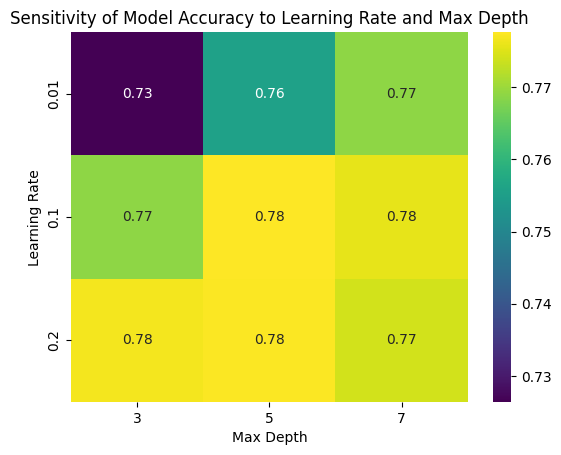

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the grid search results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Plot heatmaps or line plots to see how the model accuracy changes with different hyperparameters
# Example: Plotting the relationship between learning rate and accuracy

pivot_table = results.pivot_table(values='mean_test_score', index='param_learning_rate', columns='param_max_depth')
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Sensitivity of Model Accuracy to Learning Rate and Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Learning Rate')
plt.show()


**2. RandomizedSearchCV for XGBoost** :
RandomizedSearchCV selects random combinations of hyperparameters, which makes it faster than GridSearchCV while still providing good results.

In [40]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'colsample_bytree': [0.3, 0.5, 0.7, 1.0]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=20, cv=3, scoring='accuracy', n_jobs=-1)
random_search.fit(x_train, y_train)

# Best parameters and test accuracy
print("Best Hyperparameters:", random_search.best_params_)
best_model = random_search.best_estimator_
accuracy = best_model.score(x_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.5}
Test Accuracy: 0.78


In [46]:
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.7818


**Best Hyperparameters:** **{'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.5}**

**Test Accuracy:** **0.78**

**Hyperparameter Sensitivity Analysis RandomizedSearchCV**

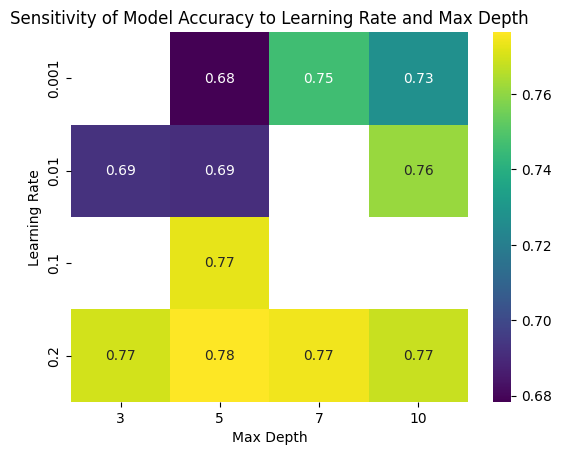

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the random_search results into a DataFrame
results = pd.DataFrame(random_search.cv_results_)

# Plot heatmaps or line plots to see how the model accuracy changes with different hyperparameters
# Example: Plotting the relationship between learning rate and accuracy

pivot_table = results.pivot_table(values='mean_test_score', index='param_learning_rate', columns='param_max_depth')
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Sensitivity of Model Accuracy to Learning Rate and Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Learning Rate')
plt.show()


**3. Bayesian Optimization (Using Hyperopt)** :
Bayesian optimization uses probabilistic models to find the best set of hyperparameters more efficiently by focusing on the most promising regions of the hyperparameter space.

In [41]:
from hyperopt import fmin, tpe, hp, Trials
import xgboost as xgb

# Define the objective function for hyperparameter optimization
def objective(space):
    xgb_clf = xgb.XGBClassifier(
        n_estimators=int(space['n_estimators']),
        max_depth=int(space['max_depth']),
        learning_rate=space['learning_rate']
    )
    xgb_clf.fit(x_train, y_train)
    accuracy = xgb_clf.score(x_test, y_test)
    return -accuracy  # Minimize the negative accuracy

# Define the search space for hyperparameters
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 200, 50),
    'max_depth': hp.quniform('max_depth', 3, 7, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

# Run the optimization
trials = Trials()
best_hyperparams = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

print("Best Hyperparameters:", best_hyperparams)


100%|██████████| 50/50 [03:16<00:00,  3.93s/trial, best loss: -0.7817663140377986]
Best Hyperparameters: {'learning_rate': 0.1825809643618197, 'max_depth': 3.0, 'n_estimators': 200.0}


In [44]:
# After optimization, train and evaluate the model with the best hyperparameters
best_xgb = xgb.XGBClassifier(
    n_estimators=int(best_hyperparams['n_estimators']),
    max_depth=int(best_hyperparams['max_depth']),
    learning_rate=best_hyperparams['learning_rate']
)

best_xgb.fit(x_train, y_train)
accuracy = best_xgb.score(x_test, y_test)

print(f"Accuracy after Bayesian optimization: {accuracy:.2f}")

Accuracy after Bayesian optimization: 0.78


In [45]:
print(f"Accuracy after Bayesian optimization: {accuracy:.4f}")

Accuracy after Bayesian optimization: 0.7818


**Best Hyperparameters: {'learning_rate': 0.1825809643618197, 'max_depth': 3.0, 'n_estimators': 200.0}**

**Accuracy after Bayesian optimization: 0.7818**

**Using Scikit-optimize library (skopt) to perform Bayesian optimization for hyperparameter tuning on an XGBoost classifier**

In [59]:
pip install scikit-optimize


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.3 MB/s eta 0:00:00


In [60]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the hyperparameter space for Bayesian Optimization
search_space = {
    'learning_rate': Real(0.01, 0.2, prior='log-uniform'),
    'max_depth': Integer(3, 9),
    'n_estimators': Integer(50, 300),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.6, 1.0)
}

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', eval_metric='mlogloss', use_label_encoder=False)

# Use Bayesian optimization (BayesSearchCV)
bayes_search = BayesSearchCV(estimator=xgb_clf, search_spaces=search_space, n_iter=32, cv=3, n_jobs=-1, scoring='accuracy', verbose=0, random_state=42)

# Fit Bayesian optimization
bayes_search.fit(x_train, y_train)

# Print the best hyperparameters and accuracy score
print("Best Hyperparameters: ", bayes_search.best_params_)
print(f"Best Accuracy: {bayes_search.best_score_:.4f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:06:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters:  OrderedDict([('colsample_bytree', 0.9111541806477735), ('learning_rate', 0.07104506876549765), ('max_depth', 5), ('n_estimators', 157), ('subsample', 0.8084870995715169)])
Best Accuracy: 0.7805


**Best Hyperparameters:  OrderedDict([('colsample_bytree', 0.9111541806477735), ('learning_rate', 0.07104506876549765), ('max_depth', 5), ('n_estimators', 157), ('subsample', 0.8084870995715169)])**

**Best Accuracy: 0.7805**

**Plot the sensitivity of accuracy to key hyperparameters (e.g., learning rate and max depth)**

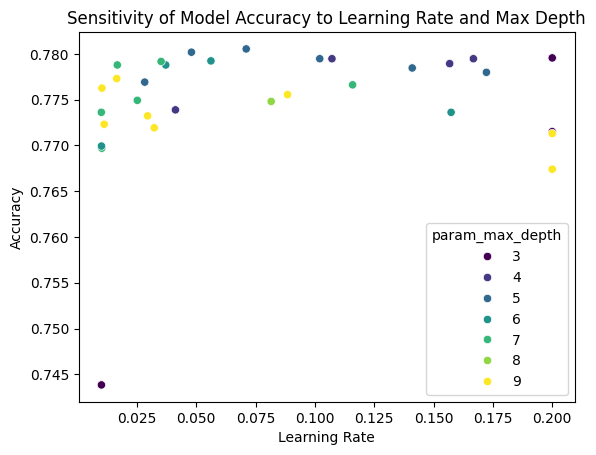

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get the optimization results
opt_results = pd.DataFrame(bayes_search.cv_results_)

# Plot the sensitivity of accuracy to key hyperparameters (e.g., learning rate and max depth)
sns.scatterplot(x='param_learning_rate', y='mean_test_score', hue='param_max_depth', data=opt_results, palette="viridis", legend='full')
plt.title('Sensitivity of Model Accuracy to Learning Rate and Max Depth')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.show()


**Full Sensitivity Analysis Across Multiple Hyperparameters**

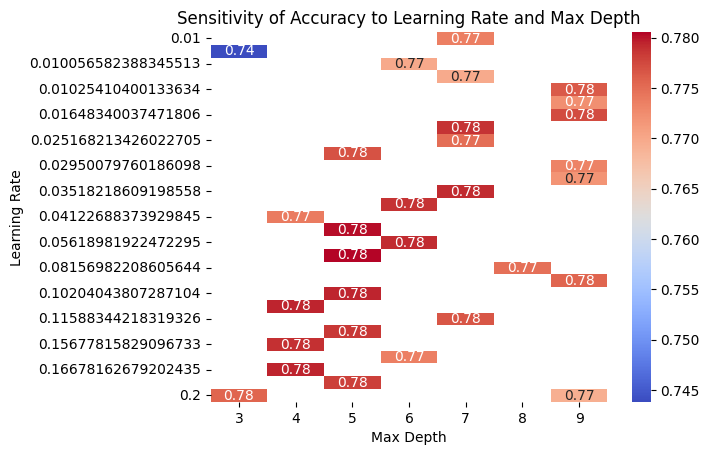

In [63]:
# Pivot the results for plotting a heatmap
pivot_table = opt_results.pivot_table(values='mean_test_score', index='param_learning_rate', columns='param_max_depth')
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Sensitivity of Accuracy to Learning Rate and Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Learning Rate')
plt.show()


**Bayesian Optimization Iterations and Convergence Plot**

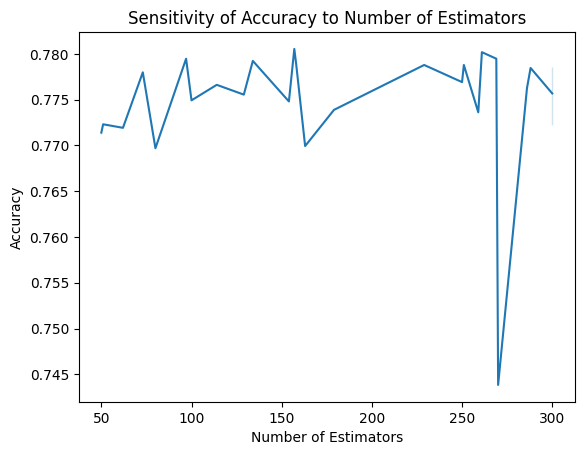

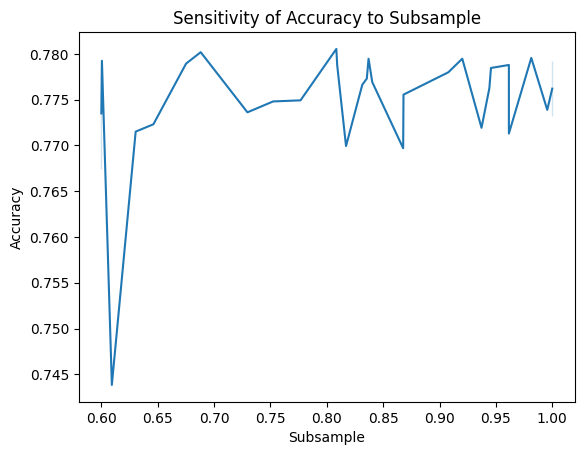

In [64]:
# Analyze 'n_estimators' vs 'mean_test_score'
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=opt_results)
plt.title('Sensitivity of Accuracy to Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.show()

# Analyze 'subsample' vs 'mean_test_score'
sns.lineplot(x='param_subsample', y='mean_test_score', data=opt_results)
plt.title('Sensitivity of Accuracy to Subsample')
plt.xlabel('Subsample')
plt.ylabel('Accuracy')
plt.show()


**Experimenting with Different Hyperparameter Combinations**

In [42]:
# Hyperparameter tuning for xgboost (Used in the session)

# Define the hyperparameter grid
param_grid = {
  'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
  'learning_rate'   : [0.001, 0.01, 0.1, 1],
  'max_depth'       : [3, 5, 8, 10],
  'alpha'           : [1, 10, 100],
  'n_estimators'    : [10,50,100]
}

index = 0

answers_grid = {
    'combination'       :[],
    'train_Accuracy'    :[],
    'test_Accuracy'     :[],
    'colsample_bytree'  :[],
    'learning_rate'     :[],
    'max_depth'         :[],
    'alpha'             :[],
    'n_estimators'      :[]

    }


# Loop through each combination of hyperparameters
for colsample_bytree in param_grid['colsample_bytree']:
  for learning_rate in param_grid['learning_rate']:
    for max_depth in param_grid['max_depth']:
      for alpha in param_grid['alpha']:
          for n_estimators in param_grid['n_estimators']:

              index = index + 1

              # Define and train the XGBoost model
              model = xgb.XGBClassifier(objective='multi:softmax',
                                       num_class=4,
                                       colsample_bytree = colsample_bytree,
                                       learning_rate = learning_rate,
                                       max_depth = max_depth,
                                       alpha = alpha,
                                       n_estimators = n_estimators)



              y = df_encoded['Approved_Flag']
              x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

              label_encoder = LabelEncoder()
              y_encoded = label_encoder.fit_transform(y)


              x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)


              model.fit(x_train, y_train)


In [43]:
#Predict on training and testing sets
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)


# Calculate train and test results

train_accuracy =  accuracy_score (y_train, y_pred_train)
test_accuracy  =  accuracy_score (y_test , y_pred_test)



# Include into the lists
answers_grid ['combination'].append(index)
answers_grid ['train_Accuracy'].append(train_accuracy)
answers_grid ['test_Accuracy'].append(test_accuracy)
answers_grid ['colsample_bytree'].append(colsample_bytree)
answers_grid ['learning_rate'].append(learning_rate)
answers_grid ['max_depth'].append(max_depth)
answers_grid ['alpha'].append(alpha)
answers_grid ['n_estimators'].append(n_estimators)


# Print results for this combination
print(f"Combination {index}")
print(f"colsample_bytree: {colsample_bytree}, learning_rate: {learning_rate}, max_depth: {max_depth}, alpha: {alpha}, n_estimators: {n_estimators}")
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy : {test_accuracy :.2f}")
print("-" * 30)


Combination 720
colsample_bytree: 0.9, learning_rate: 1, max_depth: 10, alpha: 100, n_estimators: 100
Train Accuracy: 0.79
Test Accuracy : 0.77
------------------------------


**-Combination 720**

**-colsample_bytree: 0.9, learning_rate: 1, max_depth: 10, alpha: 100 ,n_estimators: 100**

**-Train Accuracy: 0.79**

**-Test Accuracy : 0.77**

#**Note:**

**Random Forest:** Provides robustness and generalization, effective when overfitting is a concern.

**XGBoost:** Highly effective for tabular data, especially when precision and flexibility in hyperparameter tuning are important.

**Decision Tree:** Offers interpretability but can suffer from overfitting. Used as a baseline model.



# **Tuning methods:**

**GridSearchCV:** Thorough, but expensive.

**RandomizedSearchCV:** Faster but still effective.

**Bayesian Optimization:** Efficient for large search spaces and preferred for real-world applications.

# **1. Feature Importance and Selection**

**Analysis:** Understanding which features are most important in predicting the target variable (Approved_Flag) can give you insights into the dataset.

**How:** Use feature importance methods such as:

**XGBoost Feature Importance:** XGBoost provides built-in feature importance scores based on various metrics like "gain," "cover," or "weight."

**Permutation Importance:** This method helps you understand how important a feature is by measuring how model performance degrades when the feature is shuffled.

**SHAP (SHapley Additive exPlanations):** SHAP values provide a more nuanced explanation of how each feature impacts individual predictions.

**Action:** Based on the results, you could perform feature selection to simplify the model by removing less important features, which might improve generalization and interpretability.

<Figure size 1600x1600 with 0 Axes>

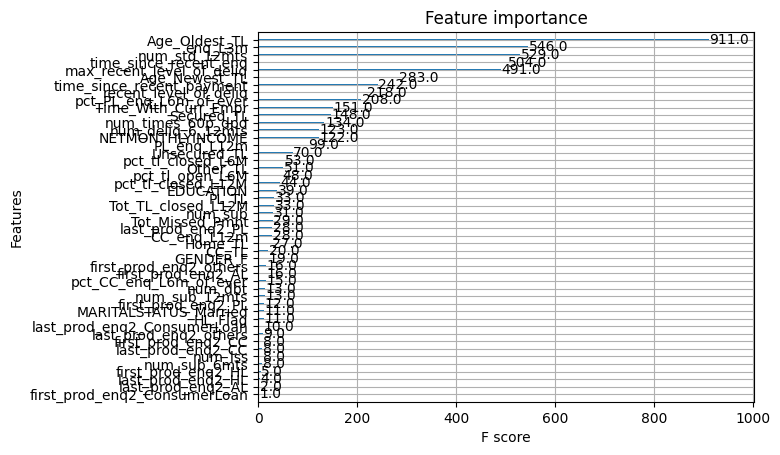

<Figure size 1600x1600 with 0 Axes>

In [54]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure



# Plot feature importance
plot_importance(best_xgb)
figure(figsize=(20, 20), dpi=80)


#**2. Cross-Validation for Model Stability**

**Analysis:** Assess how stable and generalizable your model is across different splits of the dataset.

**How:** Use k-fold cross-validation (e.g., 5-fold or 10-fold) instead of a simple train-test split. This will give you a better estimate of how the model will perform on unseen data.

**Action:** If the performance metrics vary widely across folds, consider further tuning or modifying the model.

In [55]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_xgb, x, y_encoded, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.2f}")


Cross-validation scores: [0.7798645  0.78129086 0.78200404 0.77962677 0.77864955]
Mean accuracy: 0.78


#**3. Model Comparison**

**Analysis:** Compare the performance of different models (e.g., XGBoost, Random Forest, Decision Trees) not just in terms of accuracy but also precision, recall, F1-score, and AUC (Area Under the Curve) for multiclass problems.

**How:** Use different metrics for evaluating the models. For example:
Confusion Matrix: Provides a detailed breakdown of true positives, false positives, etc., for each class.

**ROC-AUC Curves:** Although challenging for multiclass problems, you can calculate an aggregated AUC score.

**Precision-Recall Curves:** Helpful when the dataset is imbalanced.

**Action:** Based on this, you can identify which model balances precision, recall, and accuracy best for your business objective.

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1014
           1       0.83      0.91      0.87      5045
           2       0.48      0.31      0.37      1325
           3       0.73      0.74      0.73      1029

    accuracy                           0.78      8413
   macro avg       0.71      0.68      0.69      8413
weighted avg       0.76      0.78      0.76      8413

Confusion Matrix:
 [[ 772  242    0    0]
 [ 131 4609  250   55]
 [  34  662  410  219]
 [   0   70  202  757]]


# **4. Class Imbalance Handling**

**Analysis:** If the classes (e.g., p1, p2, p3, p4) are imbalanced, this can skew model performance. Imbalanced classes can lead to bias toward predicting the majority class.

**How:**Techniques to handle class imbalance include:

**Oversampling (e.g., SMOTE** – Synthetic Minority Over-sampling Technique)

**Undersampling:** Reduce the number of examples from the majority class.
Class-weight Adjustment: Adjust the weight of each class in the model to penalize misclassifications for minority classes.

**Action:** Evaluate the impact of these techniques on performance metrics like precision and recall for minority classes.

**Here we will use SMOTE.**


In [65]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)


In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

x_train, x_test, y_train, y_test = train_test_split(x_train_res, y_train_res, test_size=0.2, random_state=42)


dt_model = DecisionTreeClassifier(max_depth=20, min_samples_split=10)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print ()
print(f"Accuracy: {accuracy:.2f}")
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Accuracy: 0.80

Class p1:
Precision: 0.9097353497164461
Recall: 0.9265944645006017
F1 Score: 0.91808751639442

Class p2:
Precision: 0.7708970438328236
Recall: 0.7387057387057387
F1 Score: 0.7544581618655692

Class p3:
Precision: 0.6790754257907543
Recall: 0.6827299412915852
F1 Score: 0.6808977799463284

Class p4:
Precision: 0.8179802955665024
Recall: 0.8327482447342026
F1 Score: 0.8252982107355865

